In [2]:
# Librerias y carga de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display



In [6]:
# Carga de datos
# Dataset de Clasificaci√≥n
df_cls = pd.read_csv("data/wine_data_train_classification.csv")
print(f"Dataset Clasificaci√≥n cargado: {df_cls.shape[0]} filas, {df_cls.shape[1]} columnas")

# Dataset de Regresi√≥n
df_reg = pd.read_csv("data/wine_data_train_regression.csv")
print(f"Dataset Regresi√≥n cargado: {df_reg.shape[0]} filas, {df_reg.shape[1]} columnas")

#informaci√≥n b√°sica de los datasets
info_cls = pd.DataFrame({
    "Tipo de Dato": df_cls.dtypes,
    "Valores Nulos": df_cls.isnull().sum(),
    "Valores √önicos": df_cls.nunique(),
    "Valores No Nulos": df_cls.notnull().sum()
})

display(info_cls.style.background_gradient(cmap='Greens').set_caption("üìã Informaci√≥n General - Dataset Clasificaci√≥n"))

info_reg = pd.DataFrame({
    "Tipo de Dato": df_reg.dtypes,
    "Valores Nulos": df_reg.isnull().sum(),
    "Valores √önicos": df_reg.nunique(),
    "Valores No Nulos": df_reg.notnull().sum()
})

display(info_reg.style.background_gradient(cmap='Oranges').set_caption("üìã Informaci√≥n General - Dataset Regresi√≥n"))




Dataset Clasificaci√≥n cargado: 5847 filas, 14 columnas
Dataset Regresi√≥n cargado: 5847 filas, 13 columnas


In [7]:
print("\n=== NULOS Y DUPLICADOS ===")
print("Clasificaci√≥n - Nulos:\n", df_cls.isnull().sum())
print("Regresi√≥n - Nulos:\n", df_reg.isnull().sum())
print(f"Duplicados Clasificaci√≥n: {df_cls.duplicated().sum()}")
print(f"Duplicados Regresi√≥n: {df_reg.duplicated().sum()}")



=== NULOS Y DUPLICADOS ===
Clasificaci√≥n - Nulos:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
quality_category        0
quality_label           0
dtype: int64
Regresi√≥n - Nulos:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
quality                 0
dtype: int64
Duplicados Clasificaci√≥n: 970
Duplicados Regresi√≥n: 969



Descripci√≥n estad√≠stica del dataset de Clasificaci√≥n:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    5847.000000       5847.000000  5847.000000     5847.000000   
mean        7.218616          0.339803     0.318659        5.465401   
std         1.299384          0.164542     0.144632        4.764590   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.200000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  5847.000000          5847.000000           5847.000000  5847.000000   
mean      0.056071            30.671969            116.291859     0.994704   
std       0.035622            17.872105             56.506500     0.

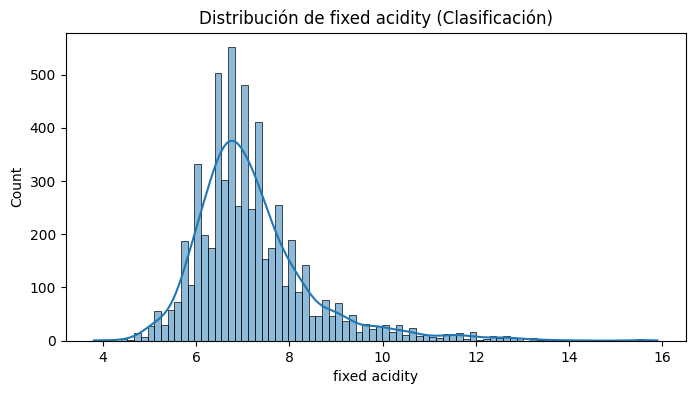

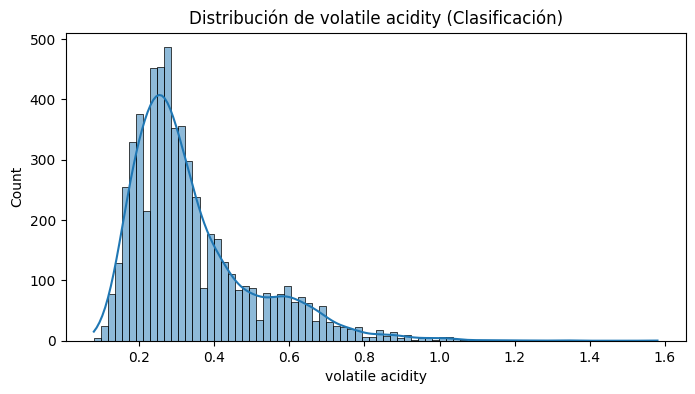

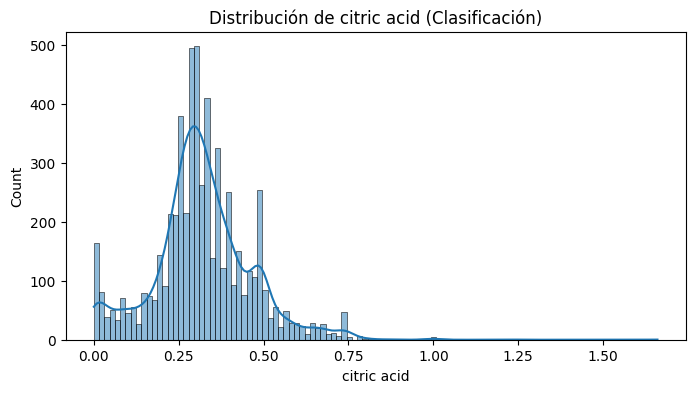

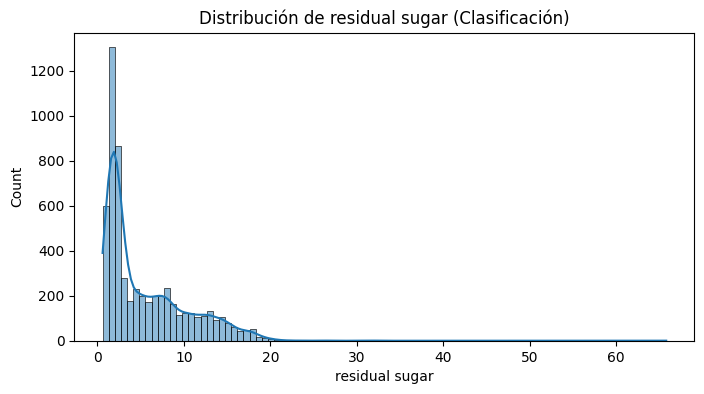

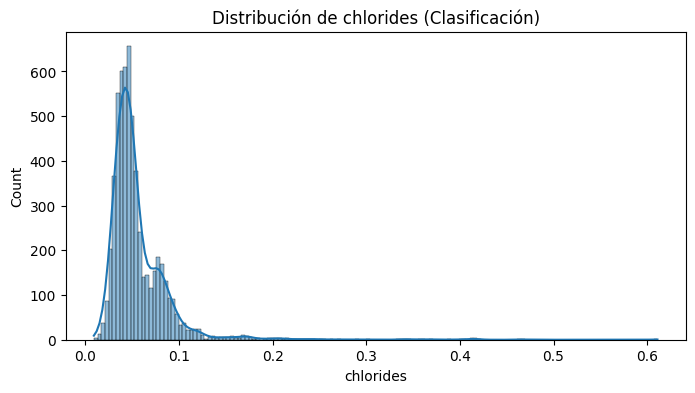

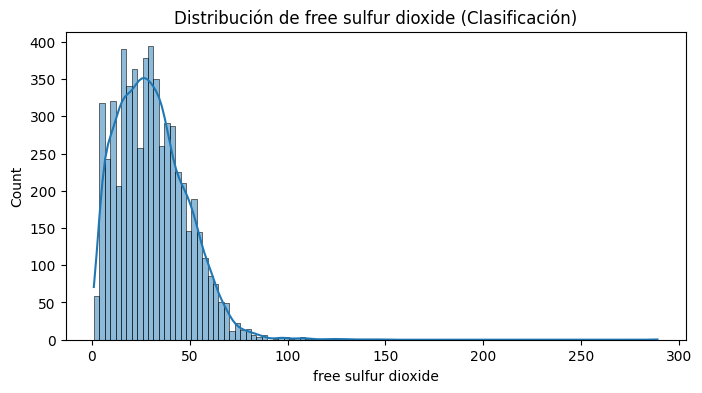

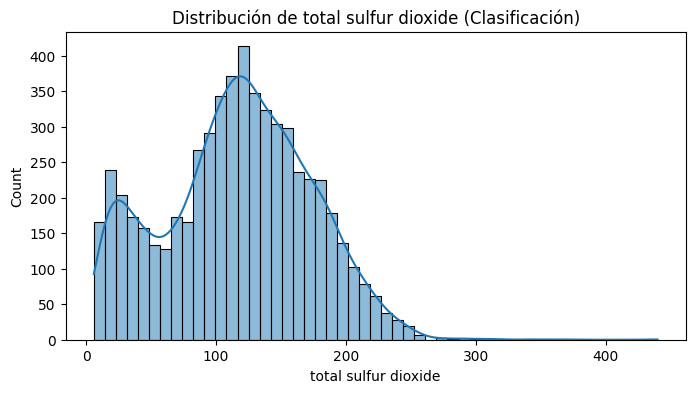

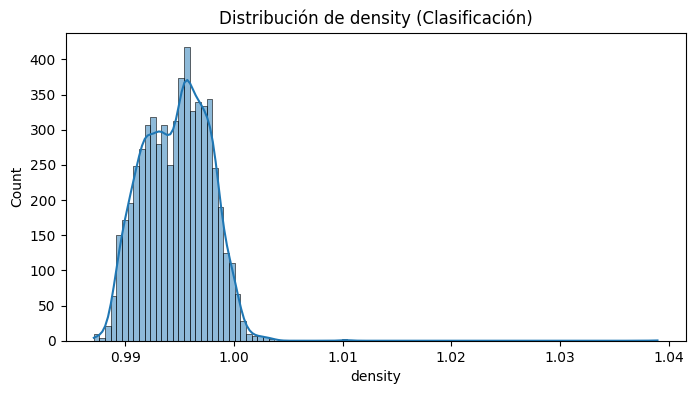

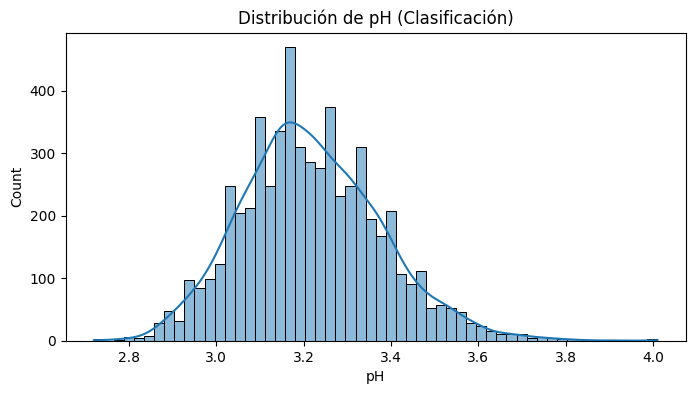

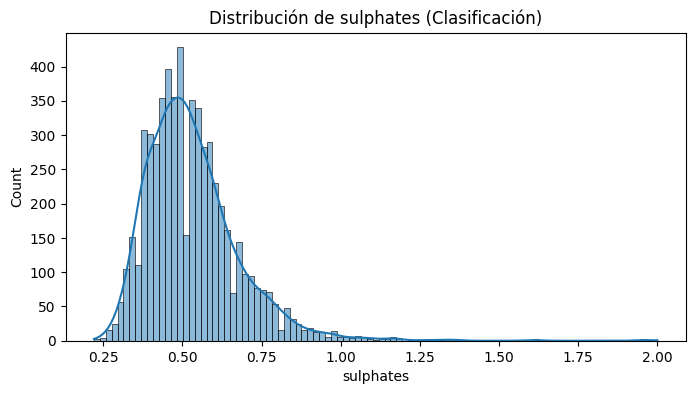

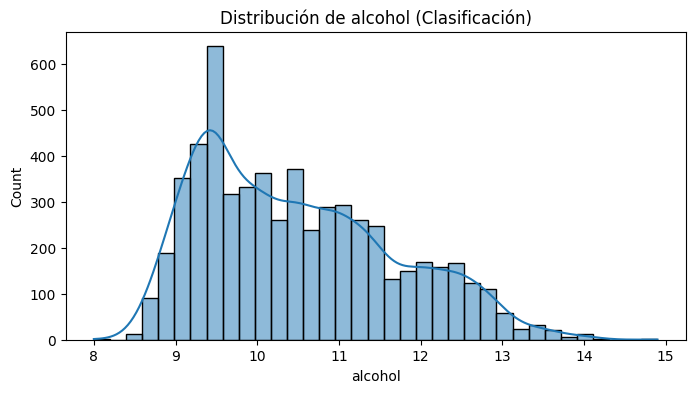

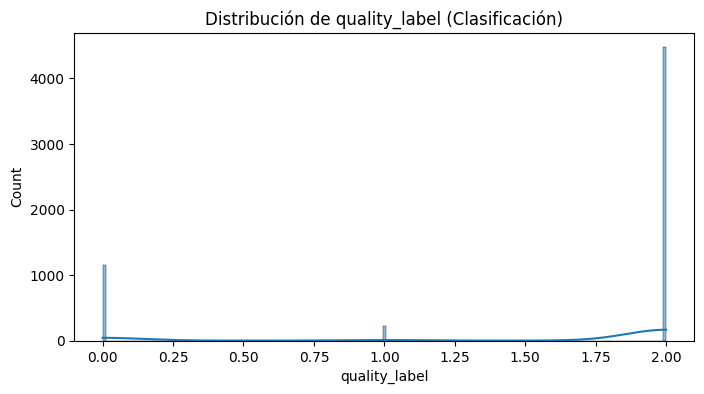

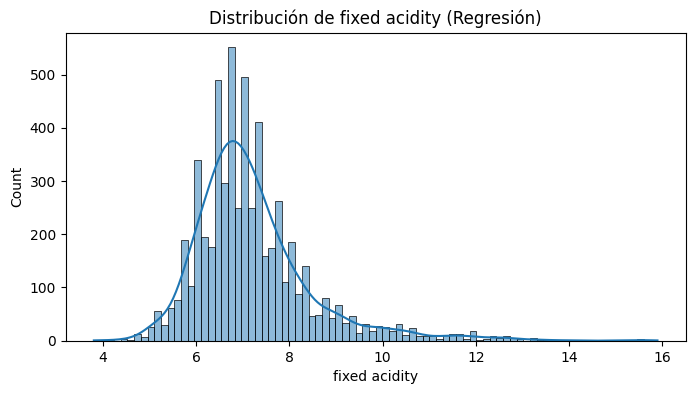

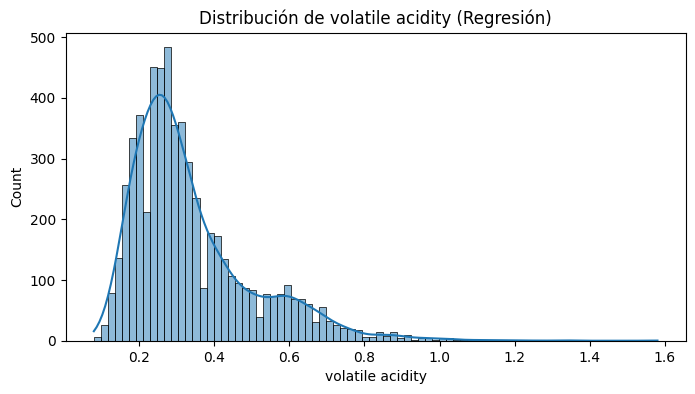

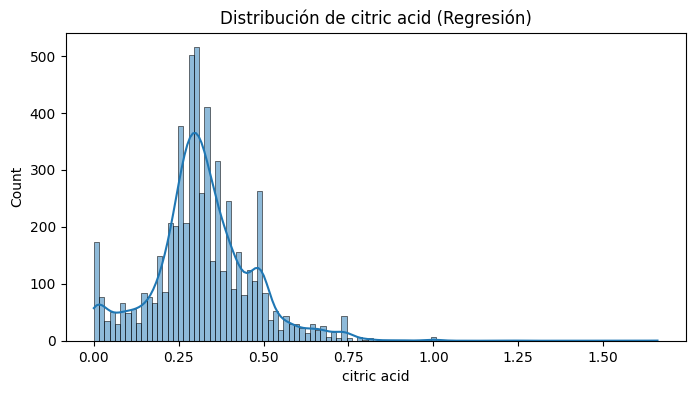

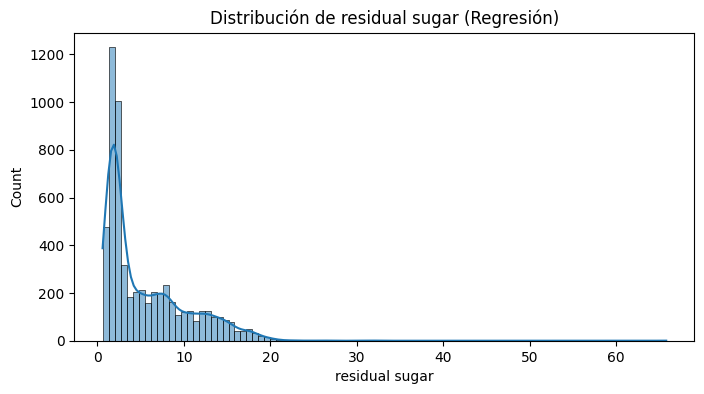

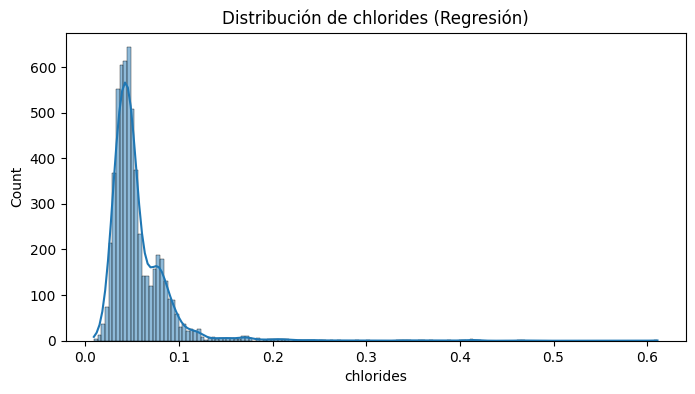

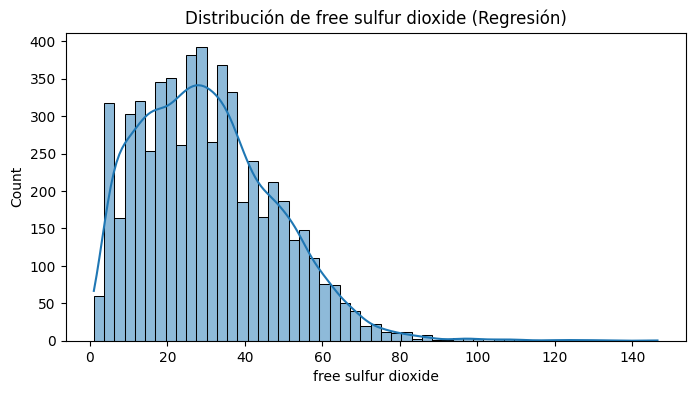

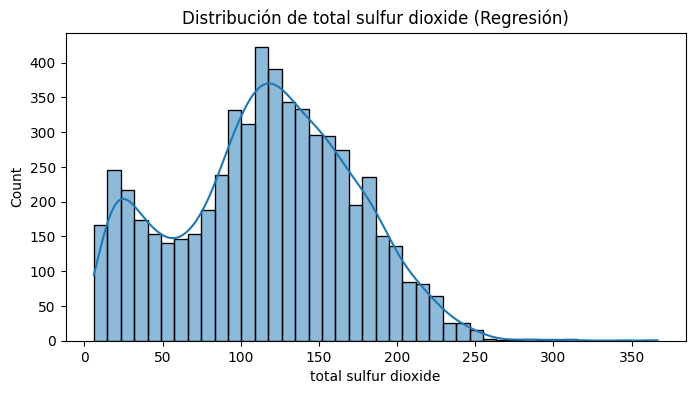

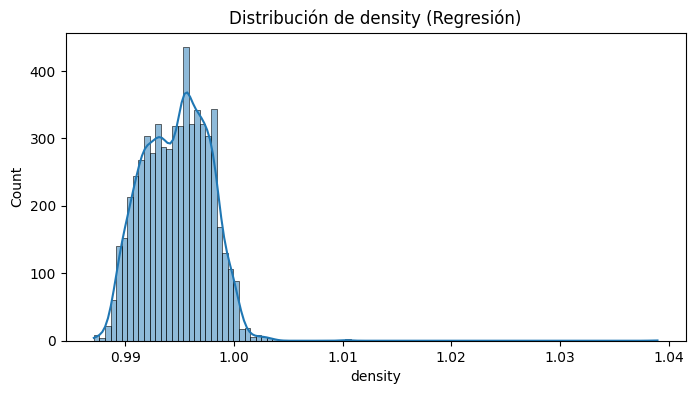

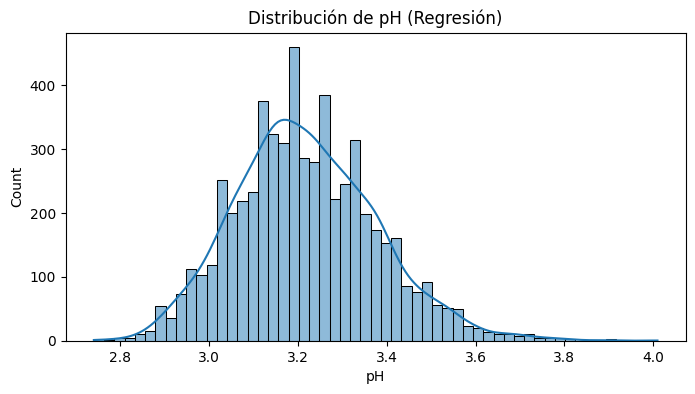

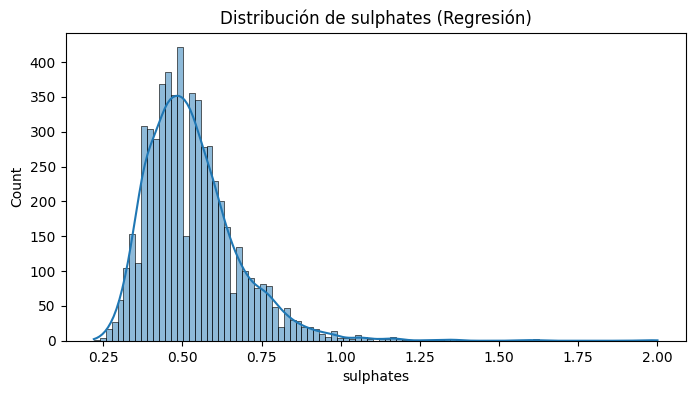

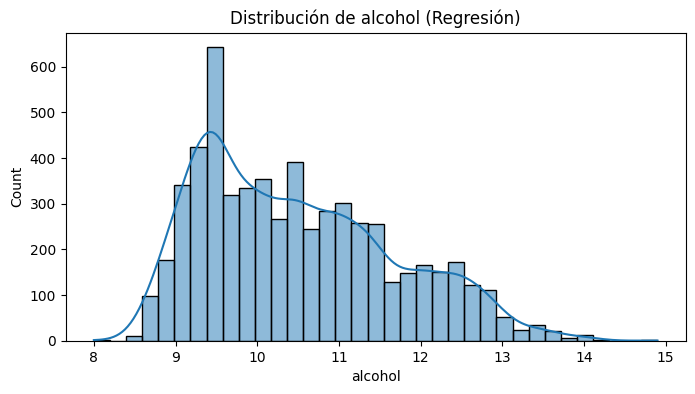

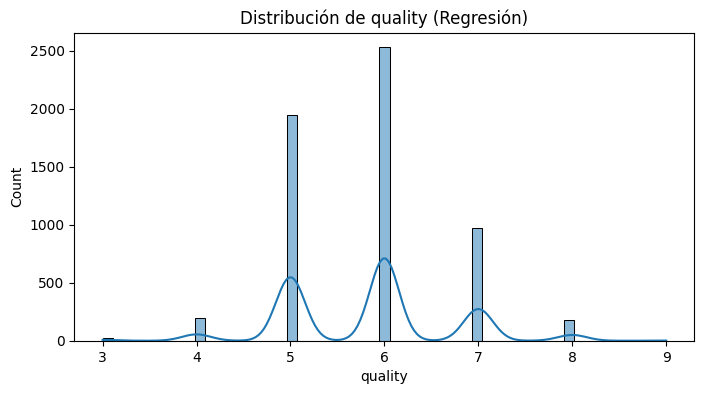

In [9]:

# An√°lisis estad√≠stico descriptivo
print("\nDescripci√≥n estad√≠stica del dataset de Clasificaci√≥n:")
print(df_cls.describe())    
print("\nDescripci√≥n estad√≠stica del dataset de Regresi√≥n:")
print(df_reg.describe())  

# Visualizaci√≥n de datos

# Identificaci√≥n de outliers
def detectar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    out = df[(df[columna] < Q1 - 1.5*IQR) | (df[columna] > Q3 + 1.5*IQR)]
    return out.shape[0]

print("\n=== OUTLIERS DETECTADOS (Clasificaci√≥n) ===")
for c in df_cls.select_dtypes(include=[np.number]).columns:
    print(f"{c}: {detectar_outliers(df_cls, c)}")
    print("\n=== OUTLIERS DETECTADOS (Regresi√≥n) ===")
for c in df_reg.select_dtypes(include=[np.number]).columns:
    print(f"{c}: {detectar_outliers(df_reg, c)}")

# Visualizaci√≥n de distribuciones de variables num√©ricas
num_cols_cls = df_cls.select_dtypes(include=[np.number]).columns
num_cols_reg = df_reg.select_dtypes(include=[np.number]).columns
for col in num_cols_cls:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_cls[col], kde=True)
    plt.title(f'Distribuci√≥n de {col} (Clasificaci√≥n)')
    plt.show()
for col in num_cols_reg:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_reg[col], kde=True)
    plt.title(f'Distribuci√≥n de {col} (Regresi√≥n)')
    plt.show()



=== OUTLIERS DETECTADOS (Clasificaci√≥n) ===
fixed acidity: 321

=== OUTLIERS DETECTADOS (Regresi√≥n) ===
volatile acidity: 339

=== OUTLIERS DETECTADOS (Regresi√≥n) ===
citric acid: 448

=== OUTLIERS DETECTADOS (Regresi√≥n) ===
residual sugar: 94

=== OUTLIERS DETECTADOS (Regresi√≥n) ===
chlorides: 282

=== OUTLIERS DETECTADOS (Regresi√≥n) ===
free sulfur dioxide: 48

=== OUTLIERS DETECTADOS (Regresi√≥n) ===
total sulfur dioxide: 12

=== OUTLIERS DETECTADOS (Regresi√≥n) ===
density: 3

=== OUTLIERS DETECTADOS (Regresi√≥n) ===
pH: 63

=== OUTLIERS DETECTADOS (Regresi√≥n) ===
sulphates: 166

=== OUTLIERS DETECTADOS (Regresi√≥n) ===
alcohol: 3

=== OUTLIERS DETECTADOS (Regresi√≥n) ===
quality_label: 1371

=== OUTLIERS DETECTADOS (Regresi√≥n) ===
fixed acidity: 314
volatile acidity: 326
citric acid: 460
residual sugar: 110
chlorides: 259
free sulfur dioxide: 55
total sulfur dioxide: 9
density: 3
pH: 66
sulphates: 167
alcohol: 3
quality: 208


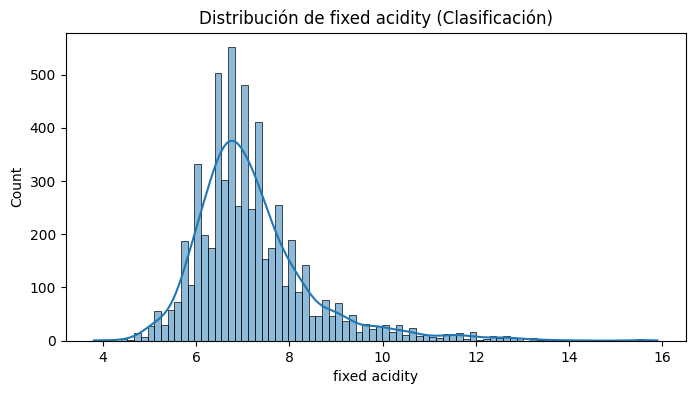

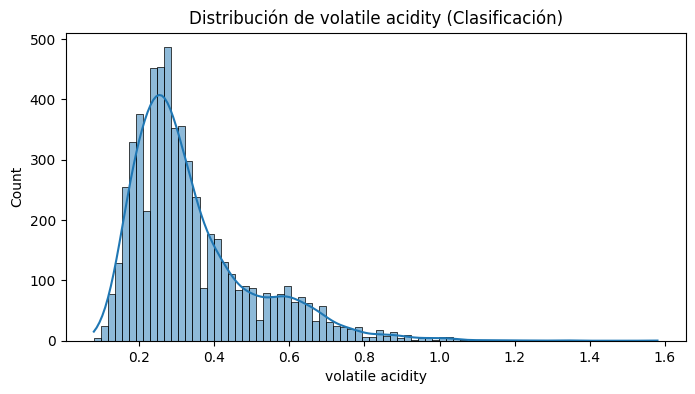

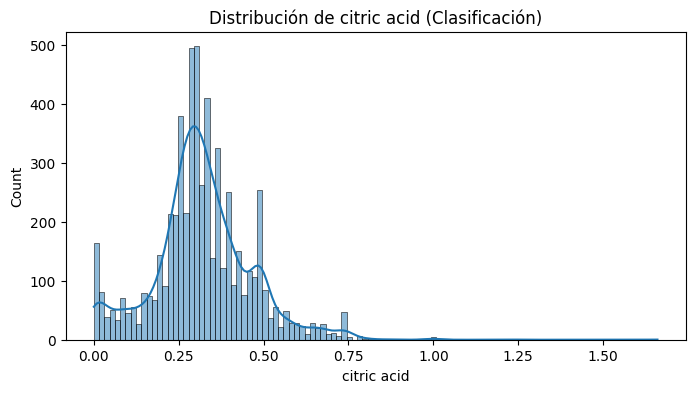

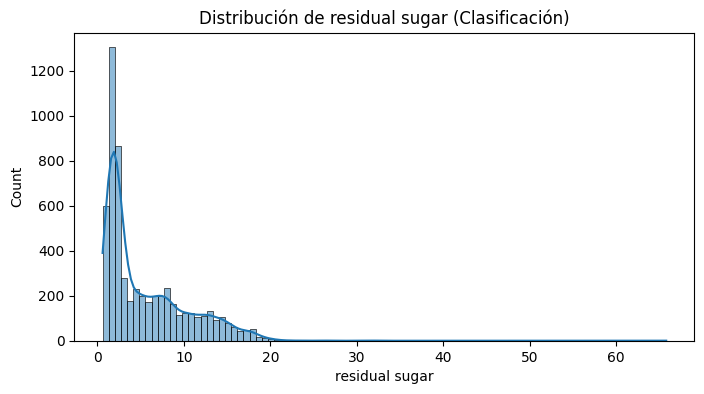

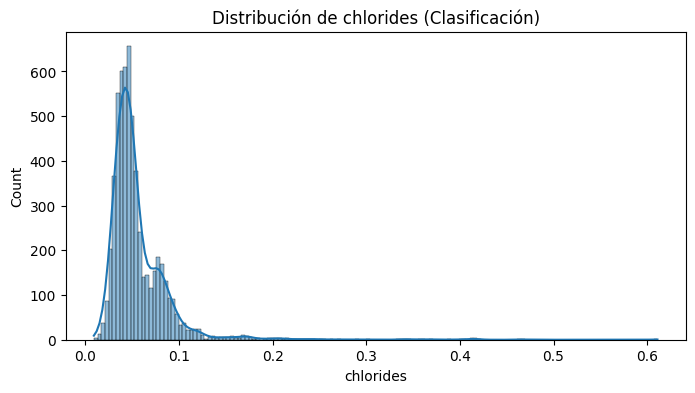

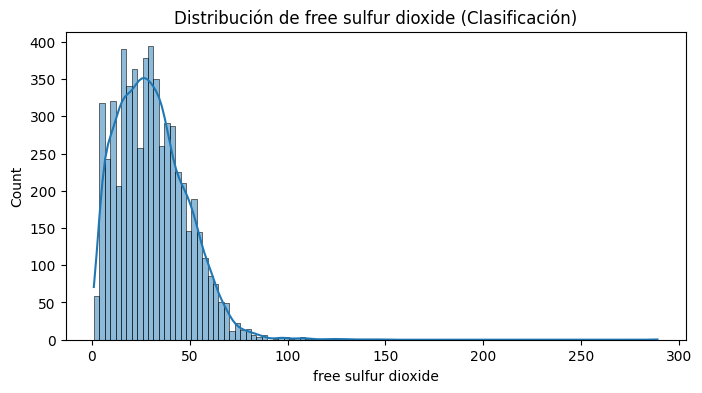

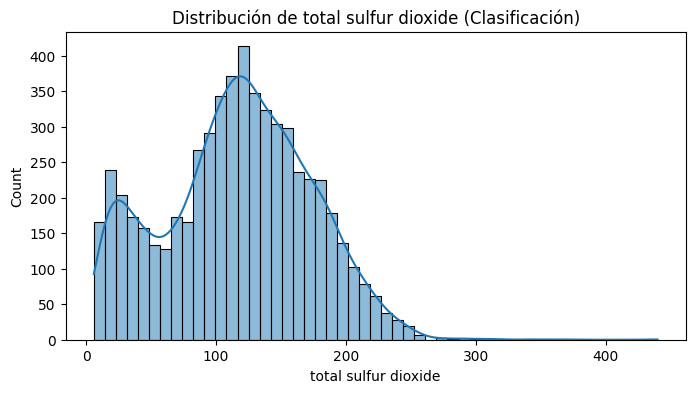

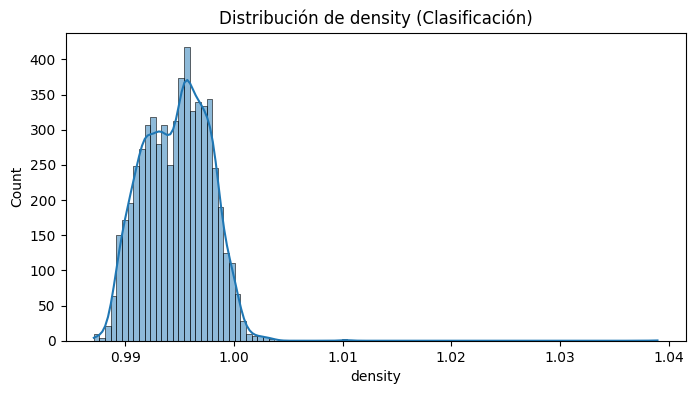

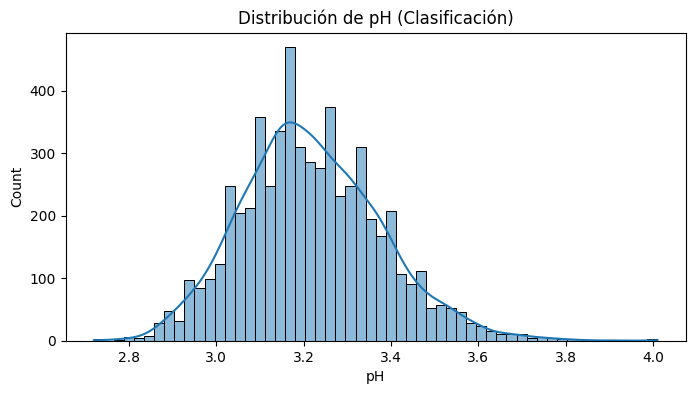

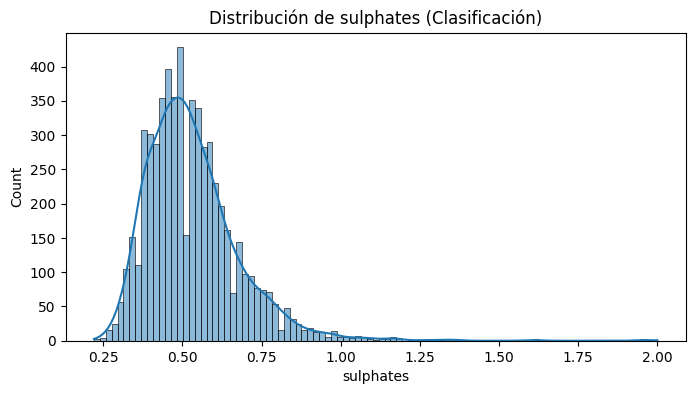

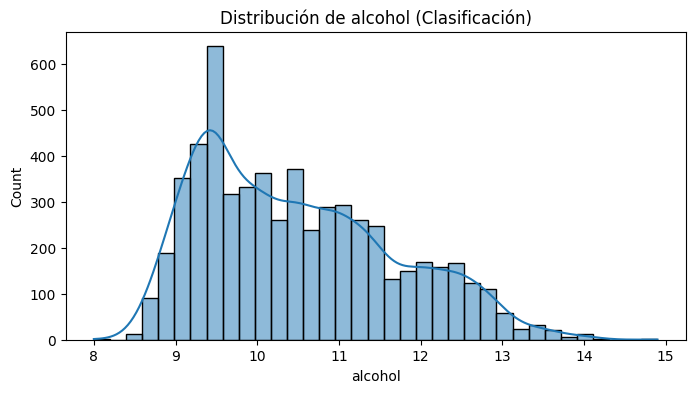

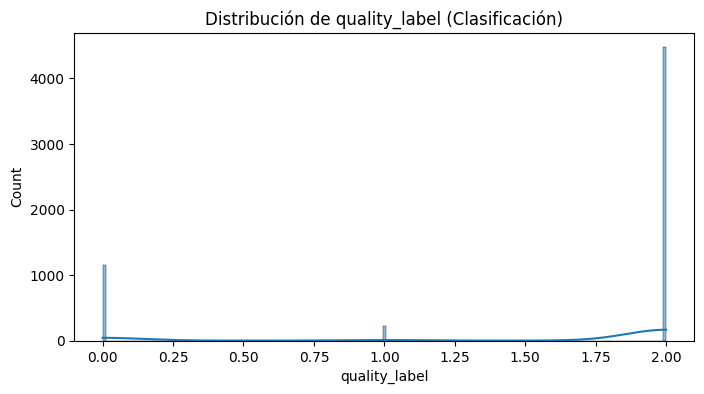

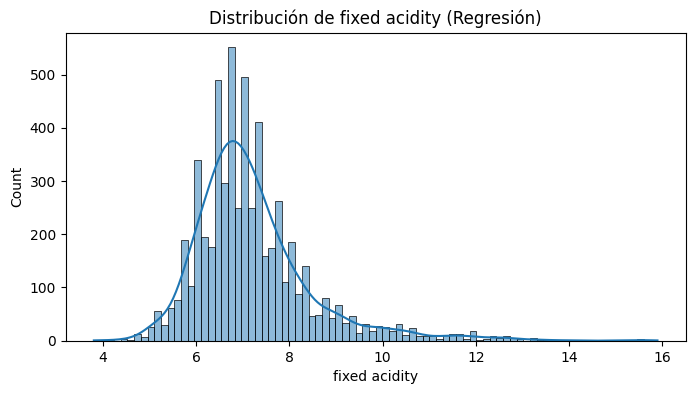

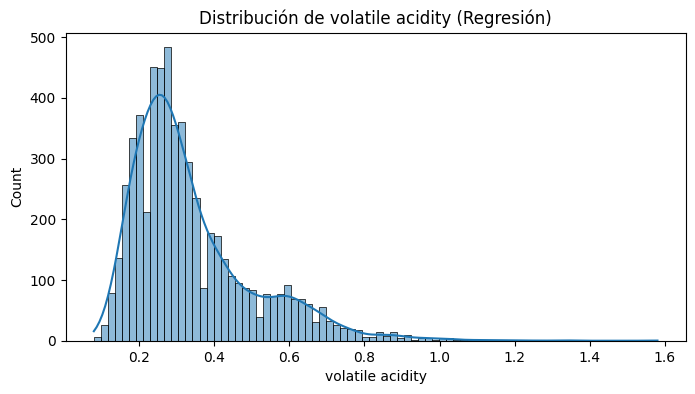

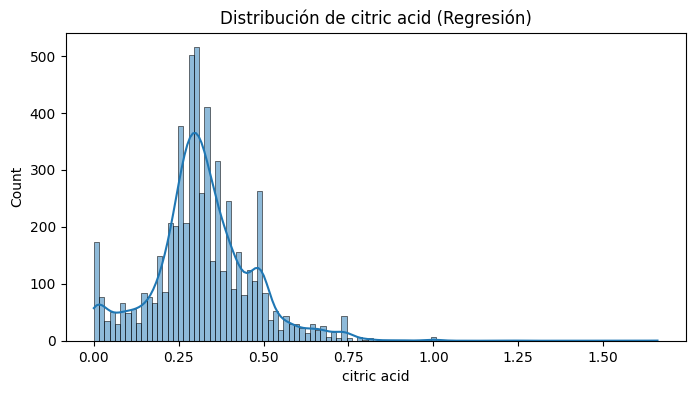

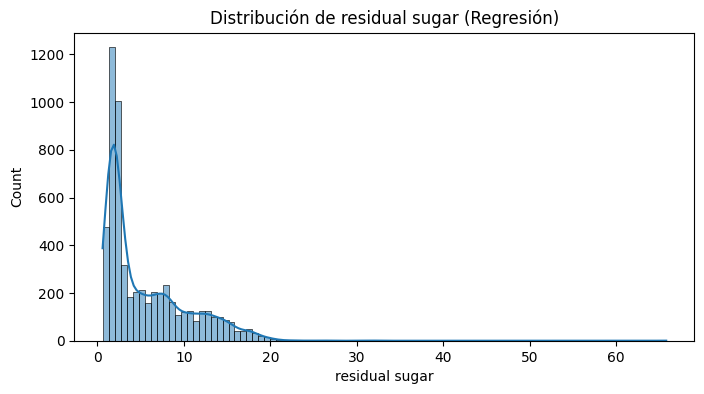

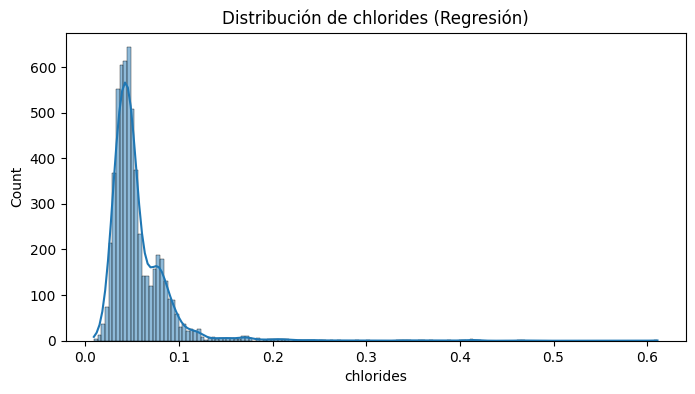

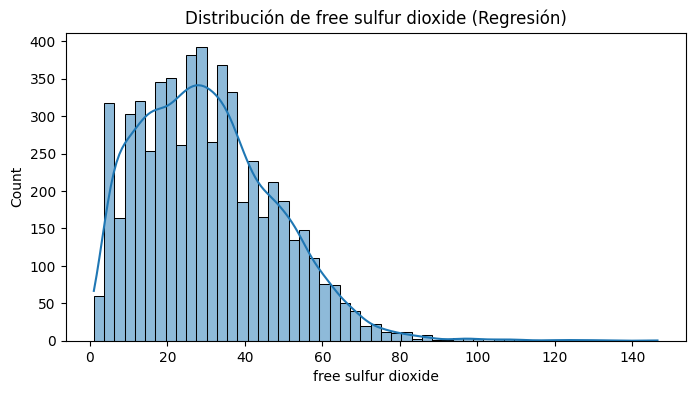

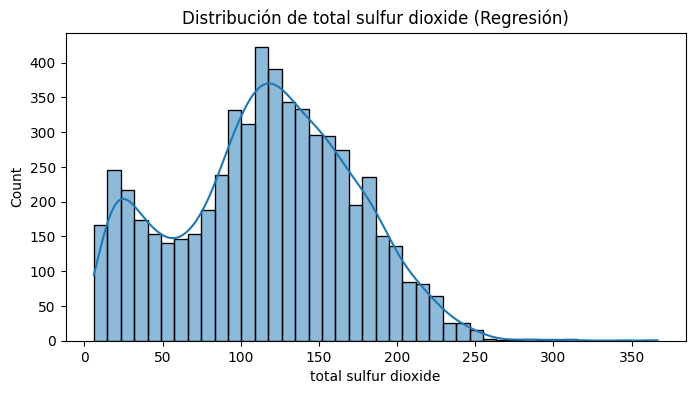

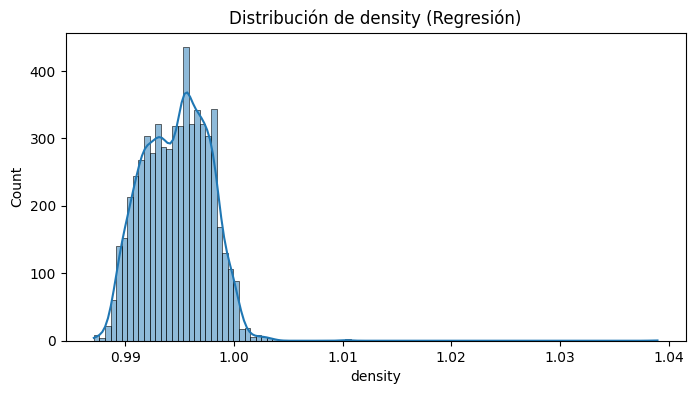

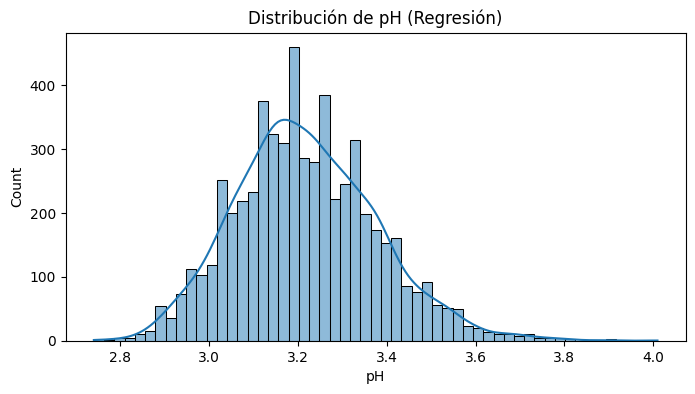

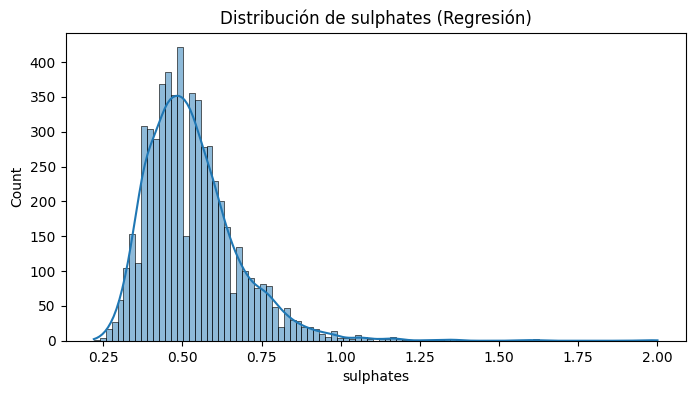

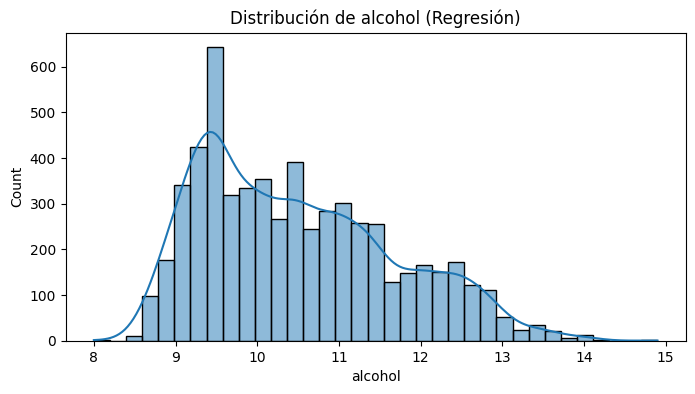

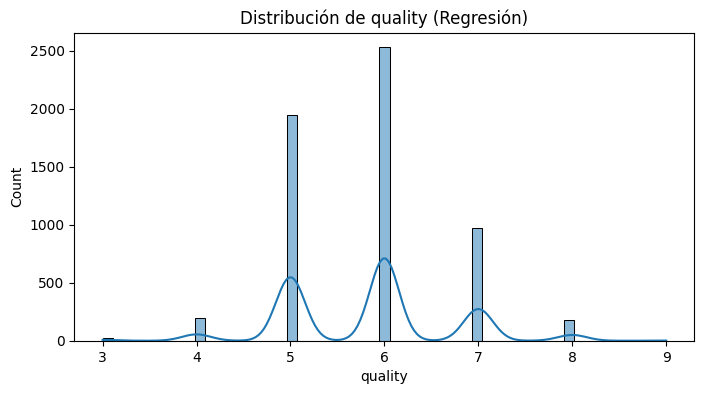

In [10]:

# Visualizaci√≥n de datos

# Identificaci√≥n de outliers
def detectar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    out = df[(df[columna] < Q1 - 1.5*IQR) | (df[columna] > Q3 + 1.5*IQR)]
    return out.shape[0]

print("\n=== OUTLIERS DETECTADOS (Clasificaci√≥n) ===")
for c in df_cls.select_dtypes(include=[np.number]).columns:
    print(f"{c}: {detectar_outliers(df_cls, c)}")
    print("\n=== OUTLIERS DETECTADOS (Regresi√≥n) ===")
for c in df_reg.select_dtypes(include=[np.number]).columns:
    print(f"{c}: {detectar_outliers(df_reg, c)}")

# Visualizaci√≥n de distribuciones de variables num√©ricas
num_cols_cls = df_cls.select_dtypes(include=[np.number]).columns
num_cols_reg = df_reg.select_dtypes(include=[np.number]).columns
for col in num_cols_cls:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_cls[col], kde=True)
    plt.title(f'Distribuci√≥n de {col} (Clasificaci√≥n)')
    plt.show()
for col in num_cols_reg:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_reg[col], kde=True)
    plt.title(f'Distribuci√≥n de {col} (Regresi√≥n)')
    plt.show()





=== CORRELACION ENTRE VARIABLES ===

=== MATRIZ DE CORRELACI√ìN (Clasificaci√≥n) ===
                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.221922     0.328988   
volatile acidity           0.221922          1.000000    -0.374766   
citric acid                0.328988         -0.374766     1.000000   
residual sugar            -0.112904         -0.191301     0.138369   
chlorides                  0.296657          0.376555     0.046942   
free sulfur dioxide       -0.281741         -0.356843     0.131695   
total sulfur dioxide      -0.325779         -0.415141     0.191276   
density                    0.456728          0.272567     0.101174   
pH                        -0.257963          0.258206    -0.330696   
sulphates                  0.294534          0.226561     0.063811   
alcohol                   -0.095595         -0.039683    -0.013491   
quality_label              0.045741          0.112270    -0.037997   

   

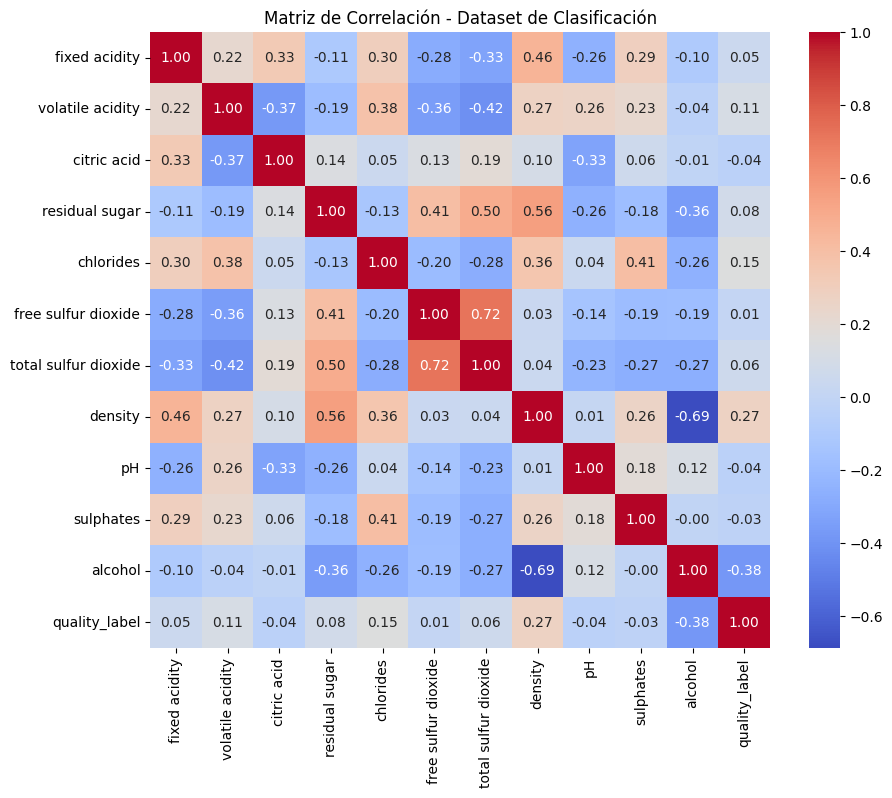

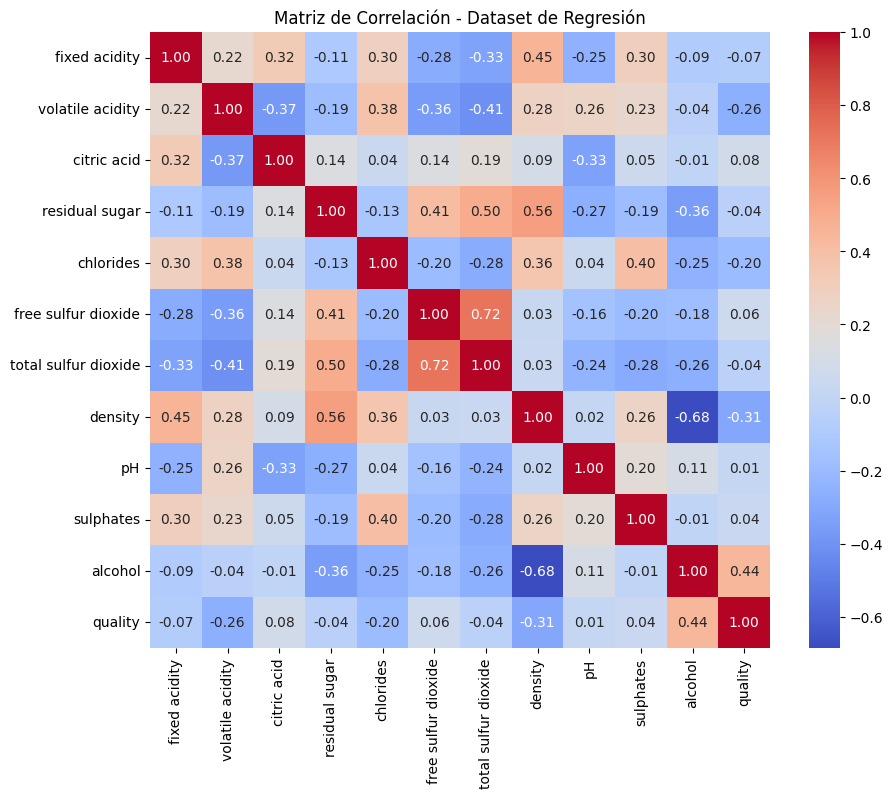


=== CORRELACIONES FUERTES (Clasificaci√≥n) ===
total sulfur dioxide  free sulfur dioxide     0.722698
free sulfur dioxide   total sulfur dioxide    0.722698
residual sugar        density                 0.556492
density               residual sugar          0.556492
                      alcohol                -0.687549
alcohol               density                -0.687549
dtype: float64

=== CORRELACIONES FUERTES (Regresi√≥n) ===
total sulfur dioxide  free sulfur dioxide     0.722499
free sulfur dioxide   total sulfur dioxide    0.722499
residual sugar        density                 0.556590
density               residual sugar          0.556590
                      alcohol                -0.684575
alcohol               density                -0.684575
dtype: float64


In [12]:
# Correlaci√≥n entre variables
print("\n=== CORRELACION ENTRE VARIABLES ===")

print("\n=== MATRIZ DE CORRELACI√ìN (Clasificaci√≥n) ===")
corr_cls = df_cls.corr(numeric_only=True)
print(corr_cls)

print("\n=== MATRIZ DE CORRELACI√ìN (Regresi√≥n) ===")
corr_reg = df_reg.corr(numeric_only=True)
print(corr_reg)

# Visualizaci√≥n de la matriz de correlaci√≥n
plt.figure(figsize=(10, 8))
sns.heatmap(corr_cls, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlaci√≥n - Dataset de Clasificaci√≥n')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_reg, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlaci√≥n - Dataset de Regresi√≥n')
plt.show()

# Identificar correlaciones m√°s fuertes (positivas y negativas)
print("\n=== CORRELACIONES FUERTES (Clasificaci√≥n) ===")
corr_pairs_cls = corr_cls.unstack().sort_values(ascending=False)
print(corr_pairs_cls[(corr_pairs_cls < 1) & (abs(corr_pairs_cls) > 0.5)])

print("\n=== CORRELACIONES FUERTES (Regresi√≥n) ===")
corr_pairs_reg = corr_reg.unstack().sort_values(ascending=False)
print(corr_pairs_reg[(corr_pairs_reg < 1) & (abs(corr_pairs_reg) > 0.5)])


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

print("\n=== PREPARACI√ìN DE DATOS PARA MODELADO ===")

# Copias de los datasets originales
data_cls = df_cls.copy()
data_reg = df_reg.copy()

# --- 1. Eliminaci√≥n de duplicados y valores nulos ---
data_cls.drop_duplicates(inplace=True)
data_reg.drop_duplicates(inplace=True)
data_cls.dropna(inplace=True)
data_reg.dropna(inplace=True)

print(f"Dataset Clasificaci√≥n limpio: {data_cls.shape[0]} filas, {data_cls.shape[1]} columnas")
print(f"Dataset Regresi√≥n limpio: {data_reg.shape[0]} filas, {data_reg.shape[1]} columnas")

# --- 2. Separar variables predictoras (X) y objetivo (y) ---
# Ajusta el nombre de la columna objetivo seg√∫n tu dataset (por ejemplo 'quality' o 'target')
target_cls = 'quality_label'  # 
target_reg = 'quality'  # 

X_cls = data_cls.drop(columns=[target_cls])
y_cls = data_cls[target_cls]

X_reg = data_reg.drop(columns=[target_reg])
y_reg = data_reg[target_reg]

# --- 3. Codificaci√≥n de variables categ√≥ricas (si existen) ---
cat_cols_cls = X_cls.select_dtypes(include=['object']).columns
cat_cols_reg = X_reg.select_dtypes(include=['object']).columns

if len(cat_cols_cls) > 0:
    print(f"Codificando variables categ√≥ricas (Clasificaci√≥n): {list(cat_cols_cls)}")
    X_cls = pd.get_dummies(X_cls, columns=cat_cols_cls, drop_first=True)

if len(cat_cols_reg) > 0:
    print(f"Codificando variables categ√≥ricas (Regresi√≥n): {list(cat_cols_reg)}")
    X_reg = pd.get_dummies(X_reg, columns=cat_cols_reg, drop_first=True)

# --- 4. Escalado de variables num√©ricas ---
scaler = StandardScaler()

X_cls_scaled = scaler.fit_transform(X_cls)
X_reg_scaled = scaler.fit_transform(X_reg)

print("Variables num√©ricas escaladas correctamente.")

# --- 5. Divisi√≥n en entrenamiento y prueba ---
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls_scaled, y_cls, test_size=0.3, random_state=42, stratify=y_cls)

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg_scaled, y_reg, test_size=0.3, random_state=42)

print("Conjuntos de entrenamiento y prueba creados exitosamente.")
print(f"Clasificaci√≥n -> Entrenamiento: {X_train_cls.shape}, Prueba: {X_test_cls.shape}")
print(f"Regresi√≥n -> Entrenamiento: {X_train_reg.shape}, Prueba: {X_test_reg.shape}")


=== PREPARACI√ìN DE DATOS PARA MODELADO ===
Dataset Clasificaci√≥n limpio: 4877 filas, 14 columnas
Dataset Regresi√≥n limpio: 4878 filas, 13 columnas
Codificando variables categ√≥ricas (Clasificaci√≥n): ['type', 'quality_category']
Codificando variables categ√≥ricas (Regresi√≥n): ['type']
Variables num√©ricas escaladas correctamente.
Conjuntos de entrenamiento y prueba creados exitosamente.
Clasificaci√≥n -> Entrenamiento: (3413, 14), Prueba: (1464, 14)
Regresi√≥n -> Entrenamiento: (3414, 12), Prueba: (1464, 12)



=== AN√ÅLISIS MULTIVARIADO ===


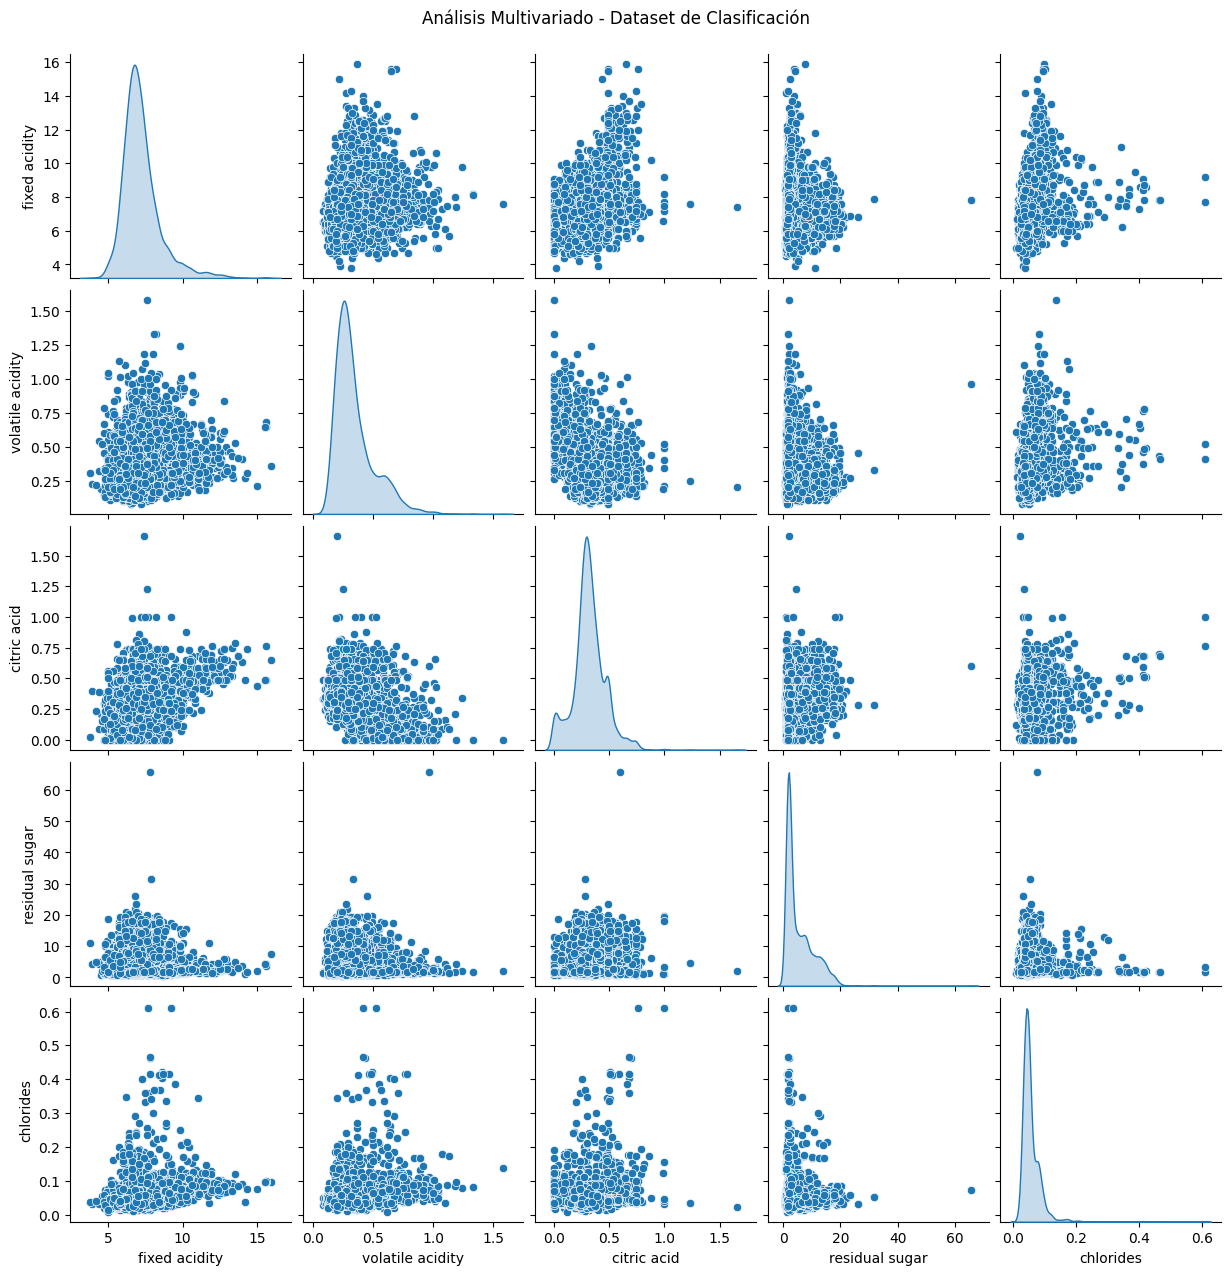

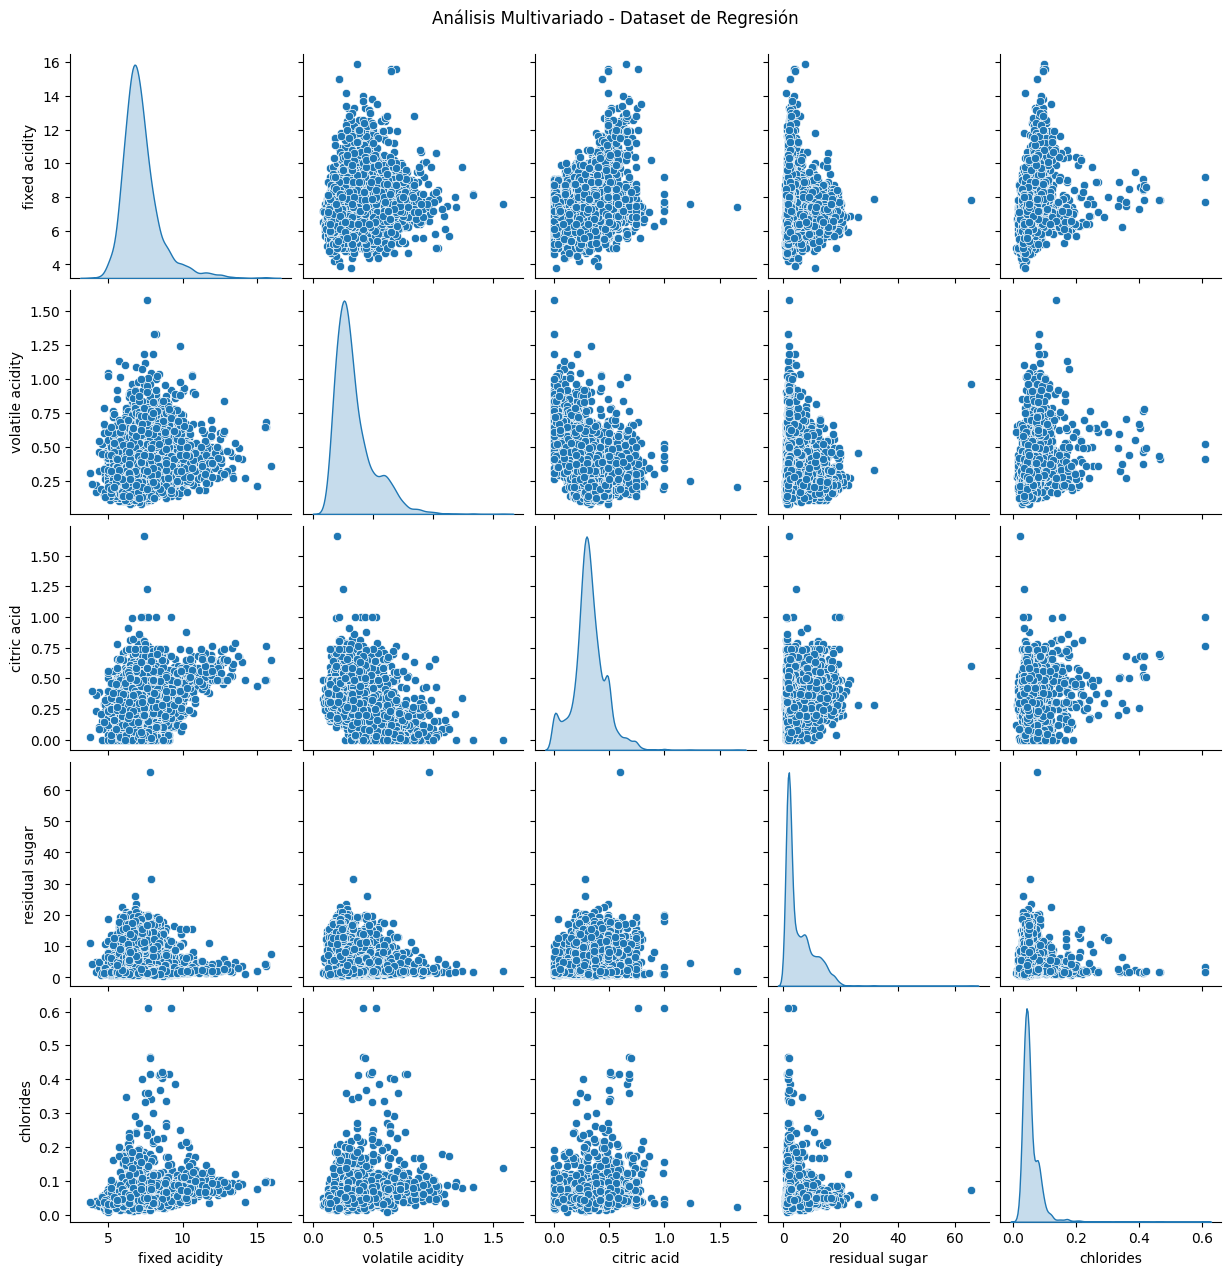

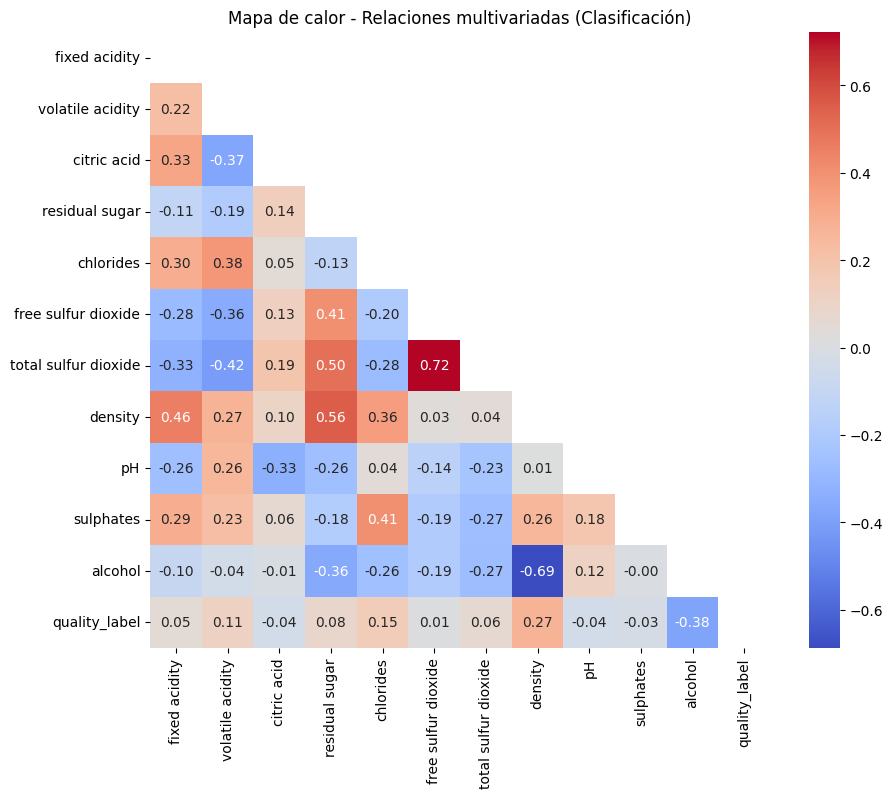

In [14]:
print("\n=== AN√ÅLISIS MULTIVARIADO ===")

# --- 1. Pares de variables num√©ricas m√°s relevantes ---
# Muestra c√≥mo se relacionan las variables entre s√≠ y con la variable objetivo
num_cols_cls = df_cls.select_dtypes(include=[np.number]).columns.tolist()
num_cols_reg = df_reg.select_dtypes(include=[np.number]).columns.tolist()

# Limitar el n√∫mero de columnas para evitar gr√°ficos muy cargados
cols_to_plot_cls = num_cols_cls[:5] + ['target'] if 'target' in df_cls.columns else num_cols_cls[:5]
cols_to_plot_reg = num_cols_reg[:5] + ['target'] if 'target' in df_reg.columns else num_cols_reg[:5]

# Pairplot (gr√°ficos de dispersi√≥n por pares)
sns.pairplot(df_cls[cols_to_plot_cls], diag_kind='kde')
plt.suptitle("An√°lisis Multivariado - Dataset de Clasificaci√≥n", y=1.02)
plt.show()

sns.pairplot(df_reg[cols_to_plot_reg], diag_kind='kde')
plt.suptitle("An√°lisis Multivariado - Dataset de Regresi√≥n", y=1.02)
plt.show()

# --- 2. Relaci√≥n entre la variable objetivo y algunas caracter√≠sticas ---
if 'target' in df_cls.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='target', y=df_cls.columns[0], data=df_cls)
    plt.title(f'Relaci√≥n entre {df_cls.columns[0]} y la variable objetivo (Clasificaci√≥n)')
    plt.show()

if 'target' in df_reg.columns:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='target', y=df_reg.columns[0], data=df_reg)
    plt.title(f'Relaci√≥n entre {df_reg.columns[0]} y la variable objetivo (Regresi√≥n)')
    plt.show()

# --- 3. Mapa de calor de correlaciones fuertes ---
plt.figure(figsize=(10, 8))
corr = df_cls.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Mapa de calor - Relaciones multivariadas (Clasificaci√≥n)")
plt.show()

In [15]:

# %%# LIMPIEZA Y TRANSFORMACI√ìN DE DATOS
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd

print("\n=== LIMPIEZA Y TRANSFORMACI√ìN DE DATOS ===")

# Copias de seguridad
df_cls_clean = df_cls.copy()
df_reg_clean = df_reg.copy()

# --- 1. ELIMINAR DUPLICADOS Y VALORES NULOS ---
print("Antes de limpieza:")
print(f"Clasificaci√≥n: {df_cls_clean.shape[0]} filas | {df_cls_clean.duplicated().sum()} duplicados")
print(f"Regresi√≥n: {df_reg_clean.shape[0]} filas | {df_reg_clean.duplicated().sum()} duplicados")

# Eliminar duplicados y filas con nulos
df_cls_clean.drop_duplicates(inplace=True)
df_reg_clean.drop_duplicates(inplace=True)
df_cls_clean.dropna(inplace=True)
df_reg_clean.dropna(inplace=True)

print("Despu√©s de limpieza:")
print(f"Clasificaci√≥n: {df_cls_clean.shape}, Regresi√≥n: {df_reg_clean.shape}")

# --- 2. DETECCI√ìN Y TRATAMIENTO DE OUTLIERS ---
def eliminar_outliers(df, columnas):
    for c in columnas:
        Q1 = df[c].quantile(0.25)
        Q3 = df[c].quantile(0.75)
        IQR = Q3 - Q1
        lim_inf = Q1 - 1.5 * IQR
        lim_sup = Q3 + 1.5 * IQR
        df = df[(df[c] >= lim_inf) & (df[c] <= lim_sup)]
    return df

num_cols_cls = df_cls_clean.select_dtypes(include=[np.number]).columns
num_cols_reg = df_reg_clean.select_dtypes(include=[np.number]).columns

df_cls_clean = eliminar_outliers(df_cls_clean, num_cols_cls)
df_reg_clean = eliminar_outliers(df_reg_clean, num_cols_reg)

print(f"Datos sin outliers -> Clasificaci√≥n: {df_cls_clean.shape}, Regresi√≥n: {df_reg_clean.shape}")

# --- 3. CODIFICACI√ìN DE VARIABLES CATEG√ìRICAS ---
# Variable 'type' (vino tinto/blanco) se convierte en 0 y 1
df_cls_clean = pd.get_dummies(df_cls_clean, columns=['type'], drop_first=True)
df_reg_clean = pd.get_dummies(df_reg_clean, columns=['type'], drop_first=True)
print("Codificaci√≥n de variable 'type' completada.")

# --- 4. ESCALAMIENTO DE VARIABLES NUM√âRICAS ---
scaler = MinMaxScaler()
num_cols_cls = df_cls_clean.select_dtypes(include=[np.number]).columns
num_cols_reg = df_reg_clean.select_dtypes(include=[np.number]).columns

df_cls_clean[num_cols_cls] = scaler.fit_transform(df_cls_clean[num_cols_cls])
df_reg_clean[num_cols_reg] = scaler.fit_transform(df_reg_clean[num_cols_reg])

print("Escalamiento Min-Max aplicado correctamente (rango 0‚Äì1).")

# --- 5. GUARDAR DATASETS TRANSFORMADOS ---
df_cls_clean.to_csv("data/wine_class_clean.csv", index=False)
df_reg_clean.to_csv("data/wine_reg_clean.csv", index=False)
print("‚úÖ Datasets limpios y transformados guardados con √©xito.")

print("EDA Wines script loaded successfully.")


=== LIMPIEZA Y TRANSFORMACI√ìN DE DATOS ===
Antes de limpieza:
Clasificaci√≥n: 5847 filas | 970 duplicados
Regresi√≥n: 5847 filas | 969 duplicados
Despu√©s de limpieza:
Clasificaci√≥n: (4877, 14), Regresi√≥n: (4878, 13)
Datos sin outliers -> Clasificaci√≥n: (2634, 14), Regresi√≥n: (3300, 13)
Codificaci√≥n de variable 'type' completada.
Escalamiento Min-Max aplicado correctamente (rango 0‚Äì1).
‚úÖ Datasets limpios y transformados guardados con √©xito.
EDA Wines script loaded successfully.
